## Специализированные программные библиотеки для анализа данных.

### Медведев Вальдемар Сергеевич 20214


In [1]:
import os

### Импортируем необходимые модули 

In [2]:
import numpy as np
import scipy, datetime
import pandas as pd
import matplotlib.pyplot as plt # библиотека для построения графиков
import matplotlib.ticker as mticker
import seaborn as sns # библиотека для построения графиков
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#sns.set()
# с помощью этой строки мы можем включать в этот документ графики:
%matplotlib inline 

### Ваши наборы данных - это разминочный датасет с ирисами и сводка по эпидемиологической обстановке в России с прошлого занятия. В этом домашнем задании 5 пунктов, постарайтесь выполнить их все. Всего за эту домашку можно получить 8 баллов.

### 1. Базовые знания о данных (1 балл)

У вас есть датасет с данными об ирисах. Посмотрите на ваши данные, выведите статистику для них. Изобразите на графике распределение значений параметров вашего набора.

In [3]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

## Загрузите игрушечный набор -- ирисы
iris = load_iris()
X = iris.data
y = iris.target
## создадим датафрейм
X = pd.DataFrame(iris.data.T, index = iris.feature_names).T
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


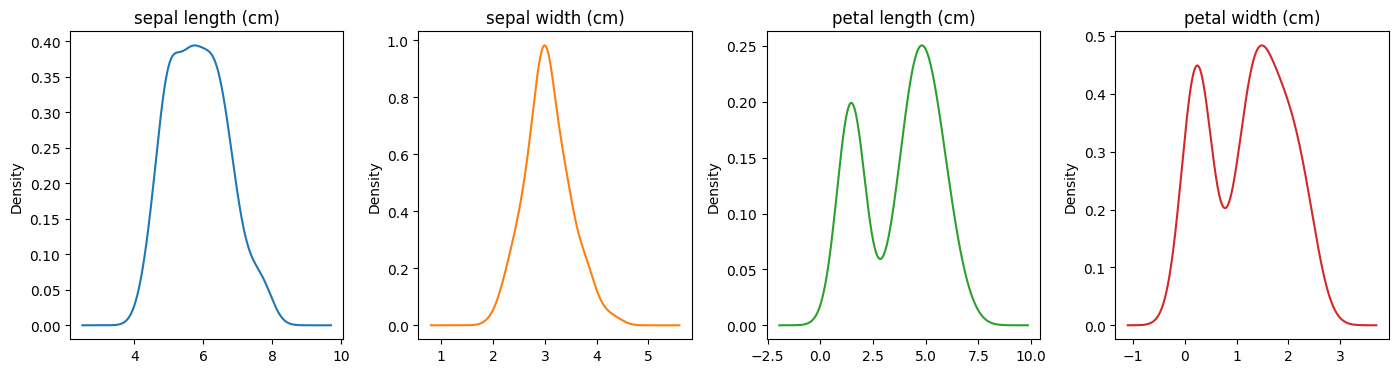

In [12]:
# YOUR CODE HERE
_ = X.plot(kind='kde', subplots=True, layout=(4,4), sharex=False, 
                         sharey=False, figsize=[14,14], legend = False,
                         title = X.columns.values.tolist())
plt.tight_layout();

### 2. Визуализация результатов PCA (2 балла)

Проведите PCA анализ для ваших данных.
1. Постройте диаграмму рассеяния в координатах PC1, PC2. Цвет точек должен соответствовать целевой переменной y, где её значения - один из 3 видов ирисов. *(1 балл)*
2. Постройте биплот, отражающий влияние исходных параметров на PC1 и PC2. *(1 балл)*

In [ ]:
# YOUR CODE HERE

##### Набор данных -- уже не столь свежая сводка по эпидемиологической обстановке в России
### 3. Аккумулирование информации по неделям (2 балла)

Для выполнения этого задания вам придется вернуться к датасету ncov_ru_j, с которым вы работали в прошлом домашнем задании.

Определите прирост числа заражений в процентах за неделю (как вы это сделаете - вопрос), если не получится - просто постройте график для среднего числа активных случаев на 100 тыс. населения со скользящим окном в 7 дней.
Пример, как посчитать, был на предыдущих занятиях - ближе к концу в ноутбуке №2.
График постройте для следующих регионов:

`
regs = ['Забайкальский край', 'Ингушетия', 'Магаданская обл.', 'Москва', 'Мурманская обл.', 
        'Новосибирская обл.', 'Омская обл.', 'Санкт-Петербург', 'Татарстан', 'Чечня']
`

Hа самом деле, смысла в выборе именно этих регионов нет - можете выбрать другие, какие вам нравятся (просто если мы сразу отрисуем все регионы на одном графике, он получится нечитаемым).

In [ ]:
#ncov_ru_j = # вставьте код генерации с прошлого домашнего задания
## либо, вы можете прочитать таблицу, но тогда приложите ее к этому домашнему заданию

## В вашей таблице должны быть колонки:
## "Активных" - число активных случаев = 'Заражений' - 'Выздоровлений' - 'Смертей'
## "Активных на 100К населения"
## "Заражений на 100К населения"
## "Смертей на 100К населения"
## "Заражений за день на 100К населения"
## "Смертей за день на 100К населения"

## Проверьте, что колонка "Дата" относится к типу "datetime64", если нет -- преобразуйте
## В качестве индексов используйте колонки "Регион" и "Дата" 

In [ ]:
regs = ['Забайкальский край', 'Ингушетия', 'Магаданская обл.', 'Москва', 'Мурманская обл.', 
        'Новосибирская обл.', 'Омская обл.', 'Санкт-Петербург', 'Татарстан', 'Чечня']

In [ ]:
# YOUR CODE HERE

### 4. Динамика прироста числа заражений (2 балла)

1. Постройте график изменения прироста числа заражений начиная с сентября 2021 года с помощью sns.lineplot(). Что произойдёт, если вы не введёте hue? Постройте и такой график. *(1 балл)*
2. Выведите оба графика в одной фигуре - в plt.subplots нужно указать число строк с помощью параметра nrows, однако, убедитесь, что получившийся график будет читаемым и различимым. *(1 балл, можно вывести сразу оба графика в plt.subplots, тогда за всё 2 балла)*

In [ ]:
## создаете figure и axes, задаете размер фигуры и разрешение: 
fig, ax = plt.subplots(figsize = [6, 2.5], dpi = 300) ## например так
sns.lineplot( x = 'Дата', y = '<Ваша колонка>', 
              data = <ваши данные>,
              hue = 'Регион',
              ax = ax )
ax.set_title('Заражений за день на 100 тыс. населения')
ax.grid(ls =':')
## Если вы считаете, что данные лучше смотреть в логарифмической шкале, можете раскомментировать код, приведенный ниже
#ax.set_xscale('log', base=10);
#ax.set_yscale('log', base=10);
## Помним про необходимость установить временные границы
ax.set_xlim([pd.to_datetime('здесь что-то должно быть...'), <тут тоже должна быть дата> ]);
plt.tight_layout()

### 5. Интерактивные графики (1 балл)

Постройте график №1 из предыдущей клетки с помощью bokeh, holoviews или plotly. Пример с holoviews есть в ноутбуке №3 - про траты на здравоохранение по странам по данным ВОЗ

In [ ]:
# import bokeh # библиотека для построения интерактивных графиков
# !pip install holoviews ## -- если вам нужна эта библиотека -- установите ее
# import holoviews as hv # импортируем holoviews
# from bokeh.io import output_notebook
# from bokeh.resources import INLINE
# import holoviews.plotting.bokeh
# output_notebook(resources=INLINE)
# os.environ['HV_DOC_HTML'] = 'true'

Домашнее задание сдаем в виде ноутбука *.ipynb -- можно расшарить ноутбук в Colab'е.  
Обязательно указываем ФИО  
Вопросы категорически приветствуются.